#### Nama : Izam Rosiawan
#### NIM : 103102400049
#### Kelas : 103102400049

--- 

# Analisis Outlier Data Penjualan Produk Elektronik

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv('Penjualan_Produk_Elektronik.csv')
df.head()

,Harga Produk (USD),Penjualan Harian (Unit),Diskon (%),Stok (Unit)
0,899.342831,21.692585,18.577874,117.100499
1,772.347140,41.587094,20.607845,143.981896
2,929.537708,43.145710,25.830512,274.729361
3,1104.605971,33.954455,25.538021,261.037027
4,753.169325,46.774286,1.223306,197.909841


## 1. Visualisasi Data: Box Plot & Scatter Plot

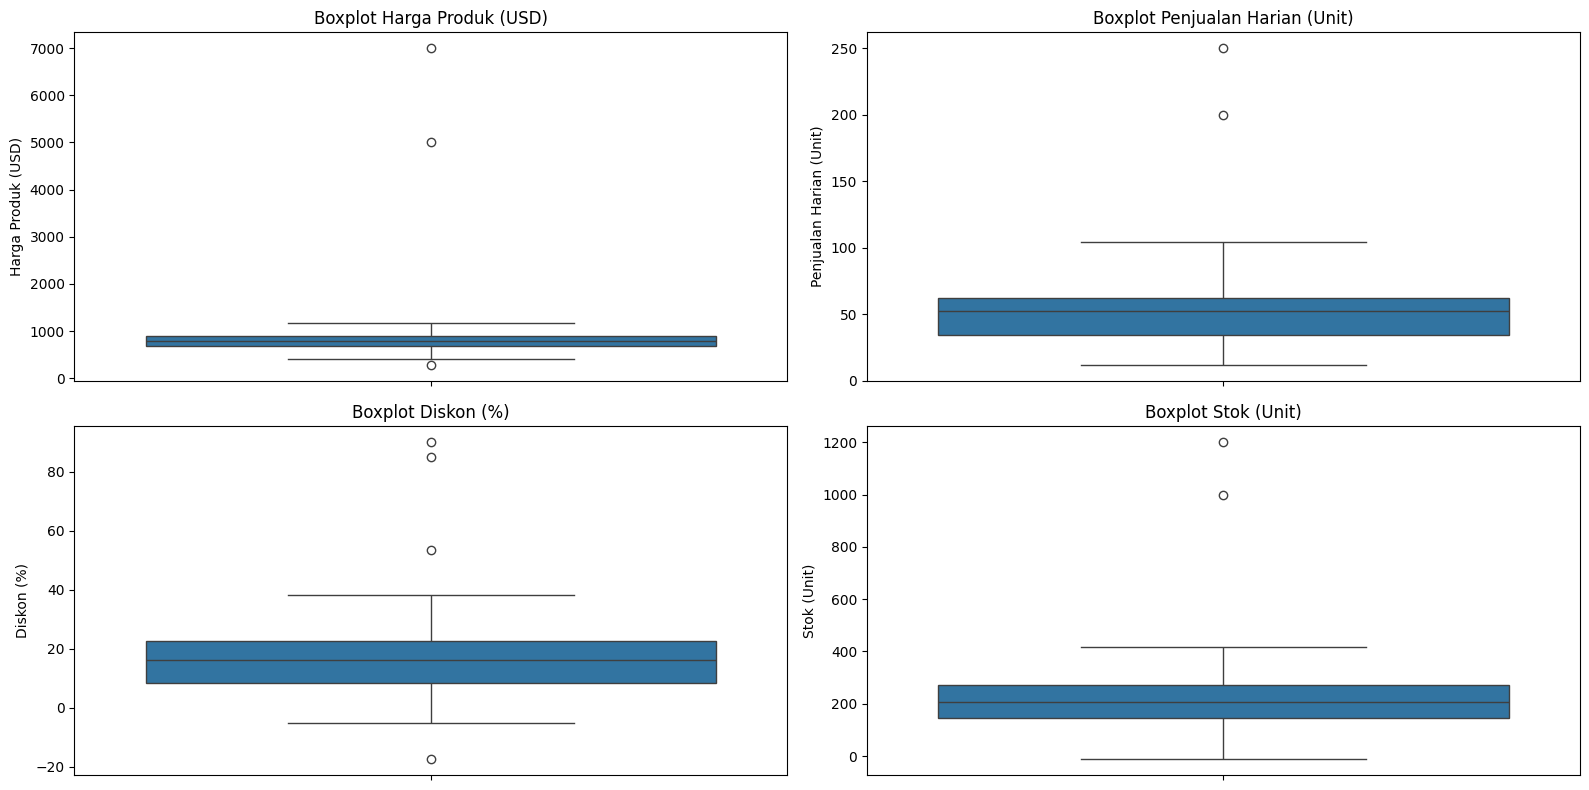

In [3]:
features = df.columns
plt.figure(figsize=(16,8))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

### Scatter Plot antar fitur
Visualisasi untuk mendeteksi outlier secara visual.

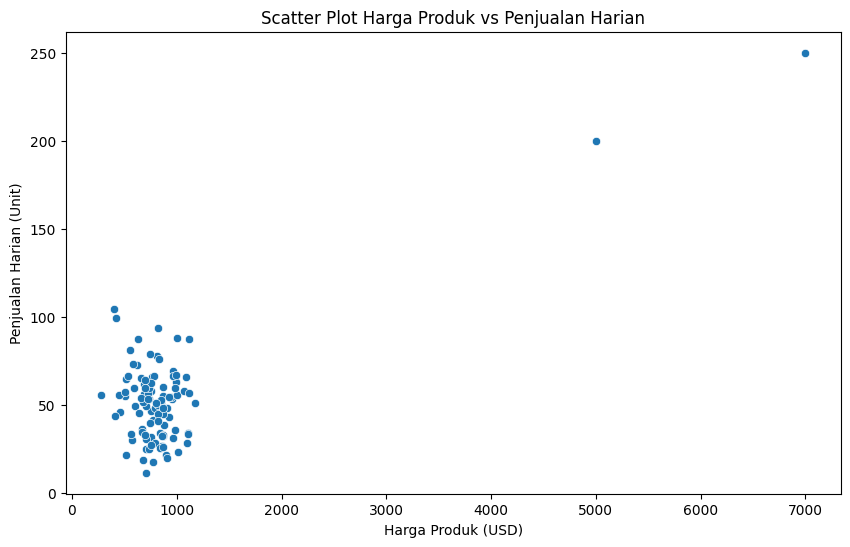

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Harga Produk (USD)'], y=df['Penjualan Harian (Unit)'])
plt.title('Scatter Plot Harga Produk vs Penjualan Harian')
plt.show()

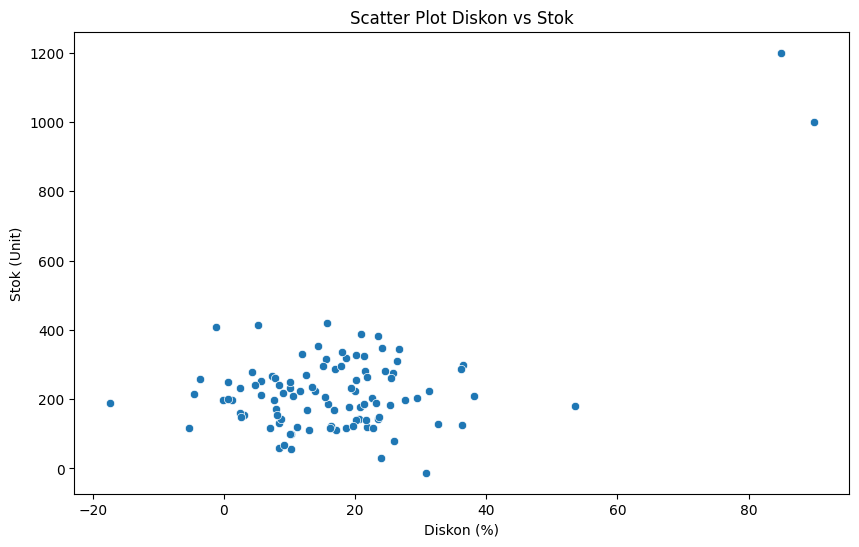

In [5]:
# Scatter Plot untuk fitur Diskon vs Stok
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Diskon (%)'], y=df['Stok (Unit)'])
plt.title('Scatter Plot Diskon vs Stok')
plt.show()

#### Jawaban Pertanyaan Visualisasi:
- Outlier pada boxplot umumnya terlihat sebagai titik yang jauh dari kotak utama.
- Scatter plot dapat memperlihatkan data yang jauh dari kelompok utama.

## 2. Deteksi Outlier Menggunakan Statistik
### a. Z-Score

In [6]:
from scipy.stats import zscore
z_scores = df.apply(zscore)

outlier_z = {}
for col in features:
    outlier_z[col] = df[np.abs(z_scores[col]) > 3][col]
    print(f'Jumlah outlier {col} (Z-Score > 3 atau < -3):', outlier_z[col].count())

Jumlah outlier Harga Produk (USD) (Z-Score > 3 atau < -3): 2
Jumlah outlier Penjualan Harian (Unit) (Z-Score > 3 atau < -3): 2
Jumlah outlier Diskon (%) (Z-Score > 3 atau < -3): 2
Jumlah outlier Stok (Unit) (Z-Score > 3 atau < -3): 2


### b. IQR

In [7]:
outlier_iqr = {}
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_iqr[col] = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f'{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Outlier={outlier_iqr[col].count()}')

Harga Produk (USD): Q1=681.79, Q3=901.83, IQR=220.04, Outlier=3
Penjualan Harian (Unit): Q1=34.05, Q3=62.32, IQR=28.27, Outlier=2
Diskon (%): Q1=8.47, Q3=22.71, IQR=14.24, Outlier=4
Stok (Unit): Q1=143.72, Q3=273.30, IQR=129.58, Outlier=2


#### Jawaban Statistik:
- Jumlah dan lokasi outlier bisa berbeda antara Z-Score dan IQR.

## 3. Transformasi Data: Log Transformation

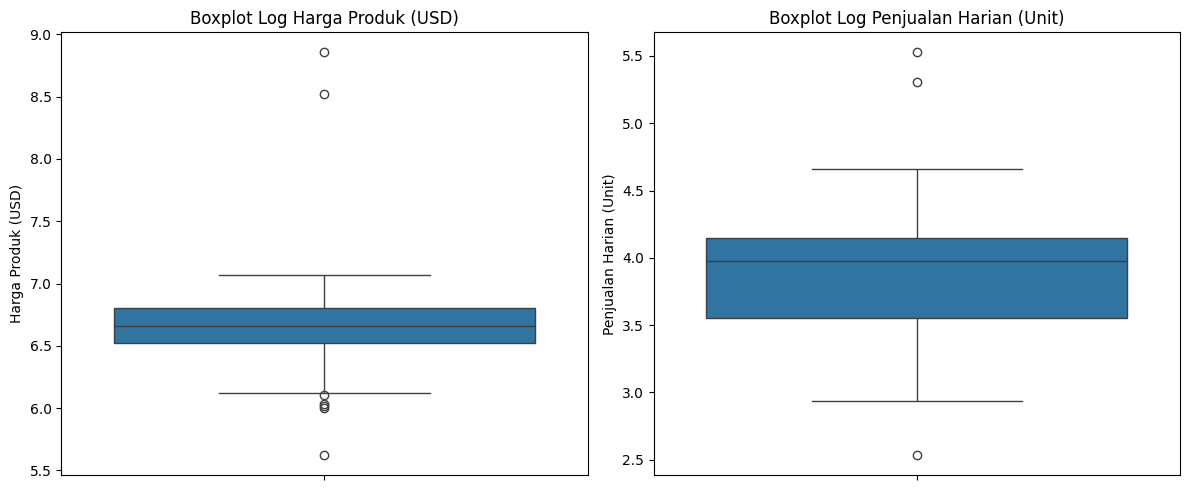

In [8]:
df_log = df.copy()
for col in ['Harga Produk (USD)','Penjualan Harian (Unit)']:
    df_log[col] = np.log1p(df_log[col])

plt.figure(figsize=(12,5))
for i, col in enumerate(['Harga Produk (USD)','Penjualan Harian (Unit)']):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=df_log[col])
    plt.title(f'Boxplot Log {col}')
plt.tight_layout()
plt.show()

#### Jawaban Transformasi:
- Log transformation biasanya mengurangi pengaruh outlier pada distribusi data.

## 4. Kesimpulan

- Outlier masih bisa tetap ada setelah transformasi, namun pengaruhnya berkurang.
- Transformasi data membuat distribusi lebih mendekati normal.
- Transformasi data adalah salah satu solusi, namun penanganan outlier tergantung tujuan analisis dan konteks bisnis.